Importing libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

uploading responses and files into dataframe

In [91]:
responses = pd.read_csv("responses.csv")

In [92]:
responses.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [93]:
responses.shape

(1010, 150)

In [94]:
list(responses.columns)

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

Copying only the 4 columns to a new dataframe

In [95]:
response = responses.drop(labels=[x for x in responses.columns if x not in ('Finances','Gender','Village - town','Healthy eating') ], axis=1)

In [96]:
response.head()

,Healthy eating,Finances,Gender,Village - town
0,4.0,3.0,female,village
1,3.0,3.0,female,city
2,3.0,2.0,female,city
3,3.0,2.0,female,city
4,4.0,4.0,female,village


In [97]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Healthy eating    1007 non-null float64
Finances          1007 non-null float64
Gender            1004 non-null object
Village - town    1006 non-null object
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [98]:
response.shape

(1010, 4)

In [99]:
response.describe().T

,count,mean,std,min,25%,50%,75%,max
Healthy eating,1007.0,3.031778,0.936865,1.0,3.0,3.0,4.0,5.0
Finances,1007.0,3.023833,1.144365,1.0,2.0,3.0,4.0,5.0


Checking for null values

In [100]:
response.isnull().values.any()


True

In [101]:
response['Finances'].isnull().sum()

3

Filling missing values using the respective mode

In [102]:
for x in list(response.columns):
    
    dt = response[x].dtype
    mode = response[x].mode()[0]
    if dt == int or dt == float:
        response[x].isnull().sum()
        response[x] = response[x].fillna(mode)
        
    else:
        response[x] = response[x].fillna(mode)
    
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
Healthy eating    1010 non-null float64
Finances          1010 non-null float64
Gender            1010 non-null object
Village - town    1010 non-null object
dtypes: float64(2), object(2)
memory usage: 31.6+ KB


In [103]:
response.isnull().values.any()


False

In [104]:
response.isnull().sum()

Healthy eating    0
Finances          0
Gender            0
Village - town    0
dtype: int64

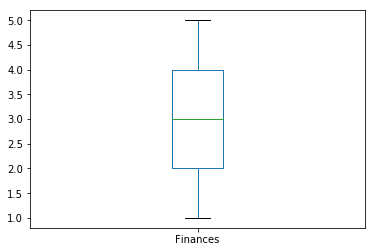

In [105]:
response['Finances'].plot(kind='box')

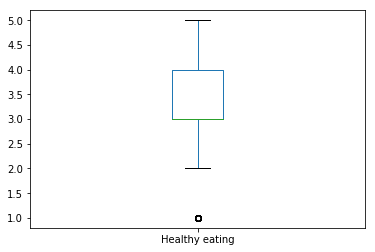

In [106]:
response['Healthy eating'].plot(kind='box')

Not treating for outliers since data is contained within the range of 1 - 5

Uni Variant analysis

Text(0, 0.5, 'Frequency')

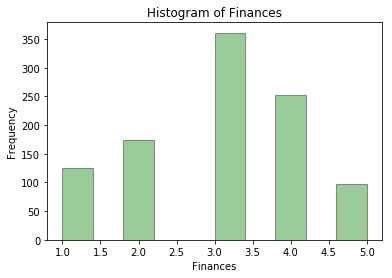

In [107]:
sns.distplot(response['Finances'], hist=True, kde=False, bins=10, color='green', hist_kws={'edgecolor':'black'})
plt.title('Histogram of Finances')
plt.xlabel('Finances')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

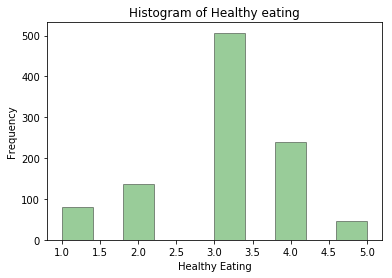

In [108]:
sns.distplot(response['Healthy eating'], hist=True, kde=False, bins=10, color='green', hist_kws={'edgecolor':'black'})
plt.title('Histogram of Healthy eating')
plt.xlabel('Healthy Eating')
plt.ylabel('Frequency')

In [109]:
response.groupby(['Gender']).sum()

,Healthy eating,Finances
Gender,,
female,1845.0,1845.0
male,1217.0,1209.0


Since the count of women is greater than men, histogram might not be best to visualize the data. So using density plot

Text(0, 0.5, 'Density')

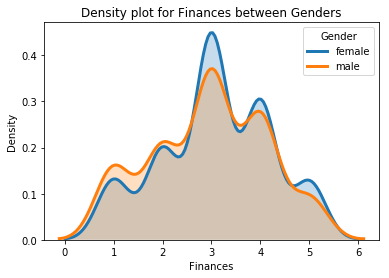

In [110]:
genders = ['female','male']

for gender in genders:
    temp = response['Finances'].where(response['Gender']==gender).dropna()
    sns.distplot(temp,hist=False, kde=True, kde_kws={'shade':True,'linewidth':3}, label=gender).set_title('Density plot for Finances between Genders')

plt.legend(title = 'Gender')
plt.xlabel('Finances')
plt.ylabel('Density')


We can infer that there is no clear relationship between finances and gender

Text(0, 0.5, 'Density')

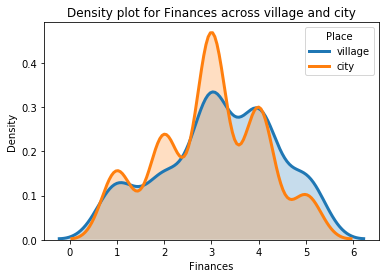

In [111]:
places = ['village','city']

for place in places:
    temp = response['Finances'].where(response['Village - town']==place).dropna()
    sns.distplot(temp,hist=False, kde=True, kde_kws={'shade':True,'linewidth':3}, label=place).set_title('Density plot for Finances across village and city')

plt.legend(title = 'Place')
plt.xlabel('Finances')
plt.ylabel('Density')

We can infer that the savings in city tends to be better in cities than in villages

Text(0, 0.5, 'Density')

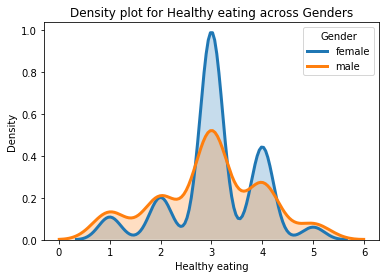

In [112]:
genders = ['female','male']

for gender in genders:
    temp = response['Healthy eating'].where(response['Gender']==gender).dropna()
    sns.distplot(temp,hist=False, kde=True, kde_kws={'shade':True,'linewidth':3}, label=gender).set_title('Density plot for Healthy eating across Genders')

plt.legend(title = 'Gender')
plt.xlabel('Healthy eating')
plt.ylabel('Density')


Data does show that females tend to lead healthier lifestyles compared to men

Text(0, 0.5, 'Density')

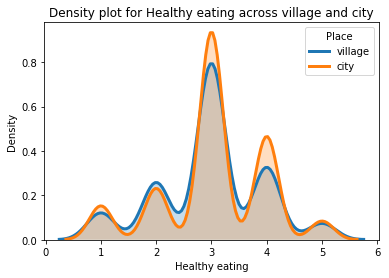

In [113]:
places = ['village','city']

for place in places:
    temp = response['Healthy eating'].where(response['Village - town']==place).dropna()
    sns.distplot(temp,hist=False, kde=True, kde_kws={'shade':True,'linewidth':3}, label=place).set_title('Density plot for Healthy eating across village and city')

plt.legend(title = 'Place')
plt.xlabel('Healthy eating')
plt.ylabel('Density')

From the data we can infer that city people lead a slightly healthier life compared to villages 

# Hypothesis testing:

Is saving money (finances) gender dependant?

Ho = Null hypothesis - There is no significant difference between genders <br>
H1 = Alternate hypothesis - There is significant difference between genders

In [114]:
Fin_Fem = response['Finances'].where(response['Gender']=='female').dropna()
Fin_Mal = response['Finances'].where(response['Gender']=='male').dropna()
t_statistic, p_value = stats.ttest_ind(Fin_Mal,Fin_Fem)
if p_value < 0.05:
    print(f"p value is {round(p_value,3)}. We reject null hypothesis. There is a significant difference between genders")
else:
     print(f"p value is {round(p_value,3)}. We failed to reject null hypothesis.")

p value is 0.058. We failed to reject null hypothesis.


Is there any differences in money saving (finances) between people from city or village?

Ho = Null Hypothesis - There is no significant difference in savings between people from city and villages<br>
H1 = Alternate Hypothesis - There is significant difference in savings between people from city and villages

In [115]:
Fin_Vil = response['Finances'].where(response['Village - town']=='village').dropna()
Fin_Cit = response['Finances'].where(response['Village - town']=='city').dropna()
t_statistic, p_value = stats.ttest_ind(Fin_Cit,Fin_Vil)
if p_value < 0.05:
    print(f"p value is {round(p_value,3)}. We reject null hypothesis. There is a significant difference in savings between city and village")
else:
     print(f"p value is {round(p_value,3)}. We failed to reject null hypothesis.")

p value is 0.008. We reject null hypothesis. There is a significant difference in savings between city and village


Do Women have a Healthier Lifestyle than Men?

Ho = Null Hypothesis - There is no significant difference in lifestyles between men and women<br>
H1 = Alternate Hypothesis - There is significant difference in lifestyles between men and women

In [116]:
Hea_Mal = response['Healthy eating'].where(response['Gender']=='male').dropna()
Hea_Fem = response['Healthy eating'].where(response['Gender']=='female').dropna()
t_statistic, p_value = stats.ttest_ind(Hea_Mal,Hea_Fem)
if p_value < 0.05:
    print(f"p value is {round(p_value,3)}. We reject null hypothesis. There is a significant difference in lifestyles between men and women")
else:
     print(f"p value is {round(p_value,3)}. We failed to reject null hypothesis.")

p value is 0.047. We reject null hypothesis. There is a significant difference in lifestyles between men and women


Are Village People Healthier than City People?

Ho = Null Hypothesis - There is no significant difference in lifestyles between people in city and village<br>
H1 = Alternate Hypothesis - There is significant difference in lifestyles between people in city and village


In [117]:
Hea_Cit = response['Healthy eating'].where(response['Village - town']=='city').dropna()
Hea_Vil = response['Healthy eating'].where(response['Village - town']=='village').dropna()
t_statistic, p_value = stats.ttest_ind(Hea_Cit,Hea_Vil)
if p_value < 0.05:
    print(f"p value is {round(p_value,3)}. We reject null hypothesis. There is a significant difference in lifestyles between people in city and village")
else:
     print(f"p value is {round(p_value,3)}. We failed to reject null hypothesis.")

p value is 0.286. We failed to reject null hypothesis.


# Conclusions:


1 - Women might manage finance better than men but there is no significant difference across genders

2 - People in city save better than people in villages and the difference is significant

3 - There is significant difference in lifestyle between men and women and according to the given data women lead a better lifestyle

4 - Data might suggest city people might lead a slightly healthier lifestyle but the differnce isn't significant